In [1]:
import IsoDAT2D as iso
import SimDAT2D as sim
import dask.array as da
import dask.dataframe as dd
import masking
import matplotlib.pyplot as plt

/home/dalverson/miniconda3/envs/venv/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


Select calibrant:
1. AgBh
2. Al
3. alpha_Al2O3
4. Au
5. C14H30O
6. CeO2
7. Cr2O3
8. cristobaltite
9. CrOx
10. CuO
11. hydrocerussite
12. LaB6
13. LaB6_SRM660a
14. LaB6_SRM660b
15. LaB6_SRM660c
16. mock
17. NaCl
18. Ni
19. PBBA
20. Pt
21. quartz
22. Si
23. Si_SRM640
24. Si_SRM640a
25. Si_SRM640b
26. Si_SRM640c
27. Si_SRM640d
28. Si_SRM640e
29. TiO2
30. ZnO
cristobaltite


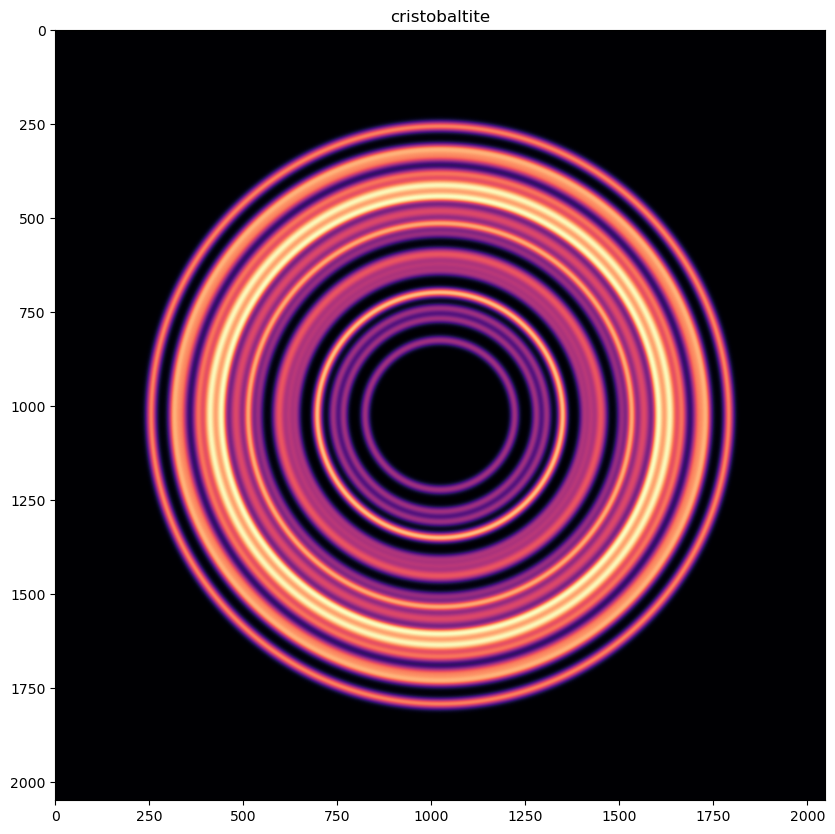

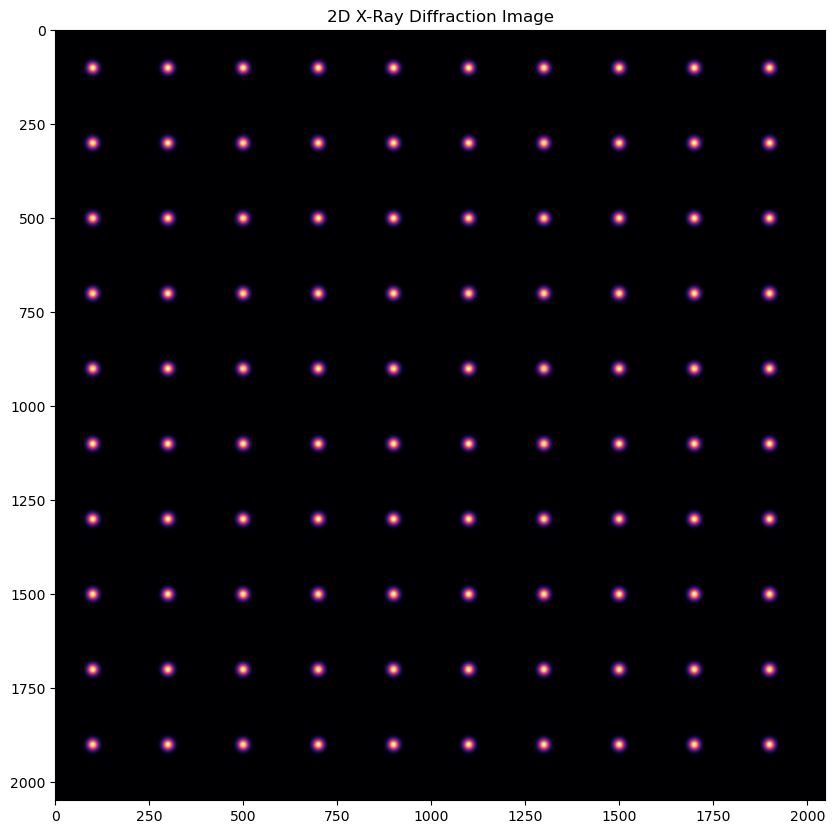

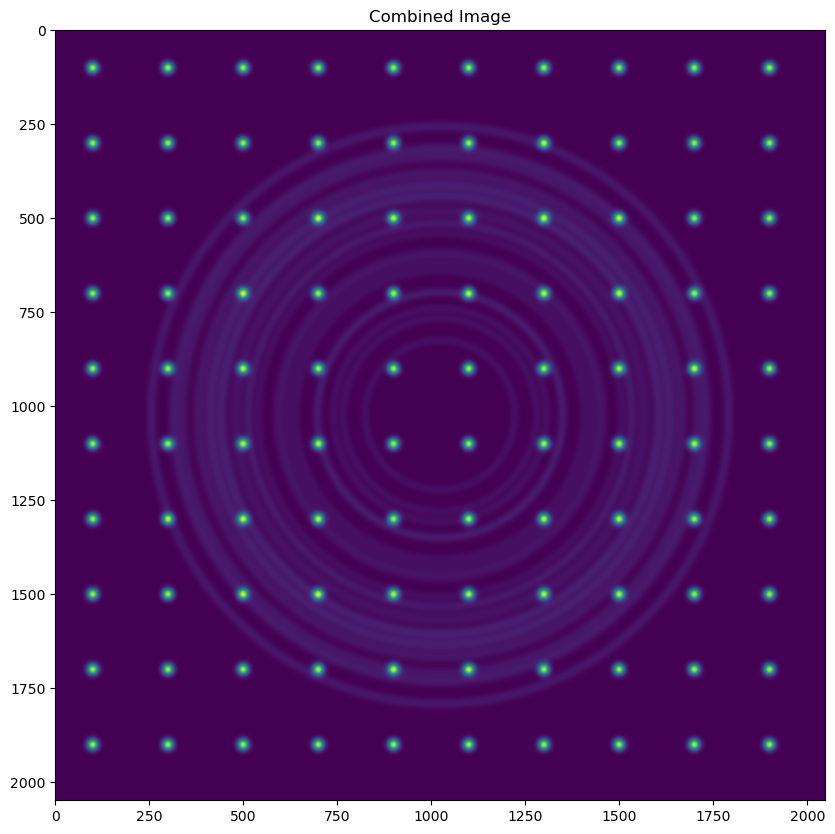

In [3]:
data = sim.combine_image(sim.create_isotropic(.4, .4e-10, cmap = 'magma'), sim.create_anisotropic(15, 10, 200, size = 200, cmap = 'magma')*24)

In [5]:
import numpy as np

In [6]:
np.save('my_sim_data.npy', data)

In [57]:
2aarray, ai_pe = masking.make_chi_array(data, .4, .4e-10)

SyntaxError: invalid decimal literal (980496930.py, line 1)

In [4]:
def generate_mask_slices(array, width, num_slices, offset = 5):
    
    ''' Returns a mask with multiple slices of the chi array left unmasked to be used for integration.
    
    Keyword arguments:
    chi_array -- chi array
    width -- width of the slice in degrees
    num_slices -- number of slices
    offset -- offset between slices in degrees
    plot -- if True, plots the mask (default False)
    
    '''
    mask_list = []
    
    # Create masks for the positive values
    for i in range(num_slices):
        start = i * (width + offset)
        end = start + width
        mask_list.append(ma.masked_inside(array, start, end))

    # Create masks for the negative values
    for i in range(num_slices):
        start = - (i + 1) * (width + offset)
        end = start - width
        mask_list.append(ma.masked_inside(array, start, end))
    
    #add all genrated masks together
    
    print(mask_list)

    combined_mask = mask_list[0]
    for mask in mask_list[1:]:
        combined_mask += mask
        
    inverted_mask = ~combined_mask.mask 
    plt.figure()
    plt.imshow(~combined_mask.mask)
    
    return inverted_mask

def rotate_generated_mask(mask, deg, offset = 1, plot = False):
    rotated_masks = []
    deg_list = np.arange(0, deg, offset)  # Adjust the range as needed
    for i in deg_list:
        rotated_mask = ma.masked_invalid(scipy_rotate(mask, angle=i, reshape=False, order=0))
        rotated_masks.append(rotated_mask)
        if plot == True:  
         plt.figure()
        
         plt.imshow(rotated_mask)
    return rotated_masks

In [11]:
    
#truncate the array to only the length from the center of the image to the edge and sweep around.
#this will ensure that all masks are the same size from the center, and that the mask does not go all the way to a corner.
    
array_cropped = array[0:array.shape[0]//2, 0:array.shape[1]//2]

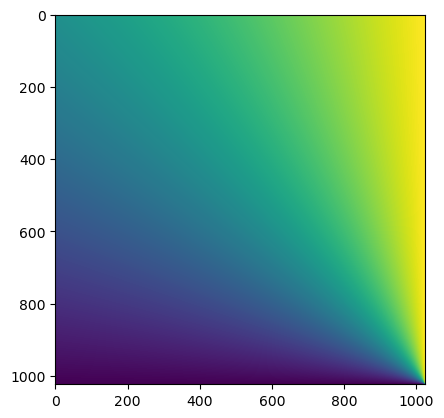

In [12]:
plt.imshow(array_cropped)

In [18]:
array_cropped.min()

-179.97202207903962

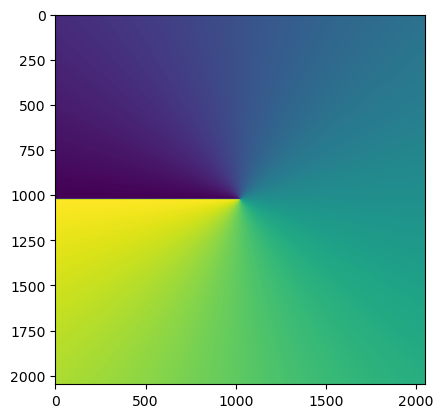

In [13]:
plt.imshow(array)

[masked_array(
  data=[[-135.00017100451313, -134.97216689027152, -134.94413749056966,
         ..., -45.05619265132289, -45.02816084175853, -45.00015640746067],
        [-135.02817528583523, -135.0001711717571, -134.97214174542282,
         ..., -45.02818839694317, -45.00015656042945, -44.97215212598207],
        [-135.05620485260465, -135.02820076548636, -135.000171339316,
         ..., -45.00015880320792, -44.972126966543236,
         -44.94412255874272],
        ...,
        [135.0561923155709, 135.02818822843457, 135.00015880225814, ...,
         45.00017134026579, 44.97213950359518, 44.94413509577675],
        [135.0281606735792, 135.000156559494, 134.9721271331666, ...,
         45.028203009199196, 45.00017117269255, 44.972166738238265],
        [135.00015640652705, 134.97215229229232, 134.94412289261135, ...,
         45.05620724928089, 45.028175439737566, 45.00017100544677]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

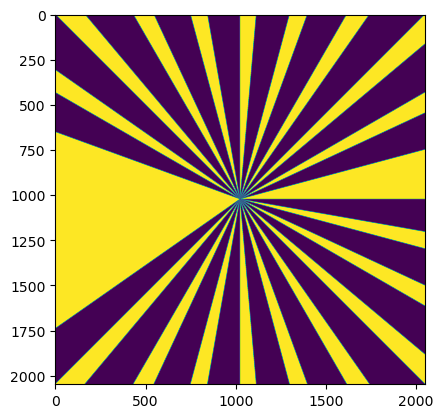

In [19]:
my_mask = masking.generate_mask_slices(array, 10, 10, offset = 5)

In [21]:
import numpy as np
import numpy.ma as ma

def make_it_even(array):
    # Create a meshgrid of indices
    x, y = np.indices(array.shape)

    # Calculate the distance from the center
    center_x, center_y = array.shape[1] // 2, array.shape[0] // 2
    radius = 1024
    distances = np.sqrt((x - center_x)**2 + (y - center_y)**2)

    # Create a mask based on the distances
    mask = ma.masked_where(distances > radius, array)
    
    return mask


In [22]:
new_mask = make_it_even(my_mask)

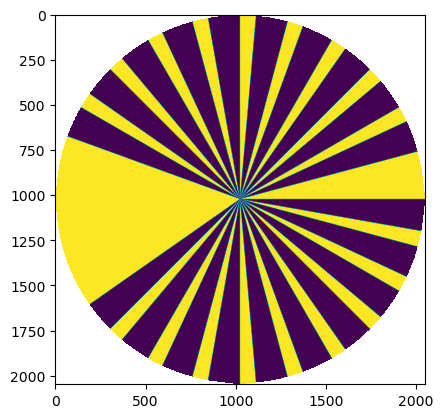

In [24]:
plt.imshow(new_mask)

In [27]:
print(new_mask)

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


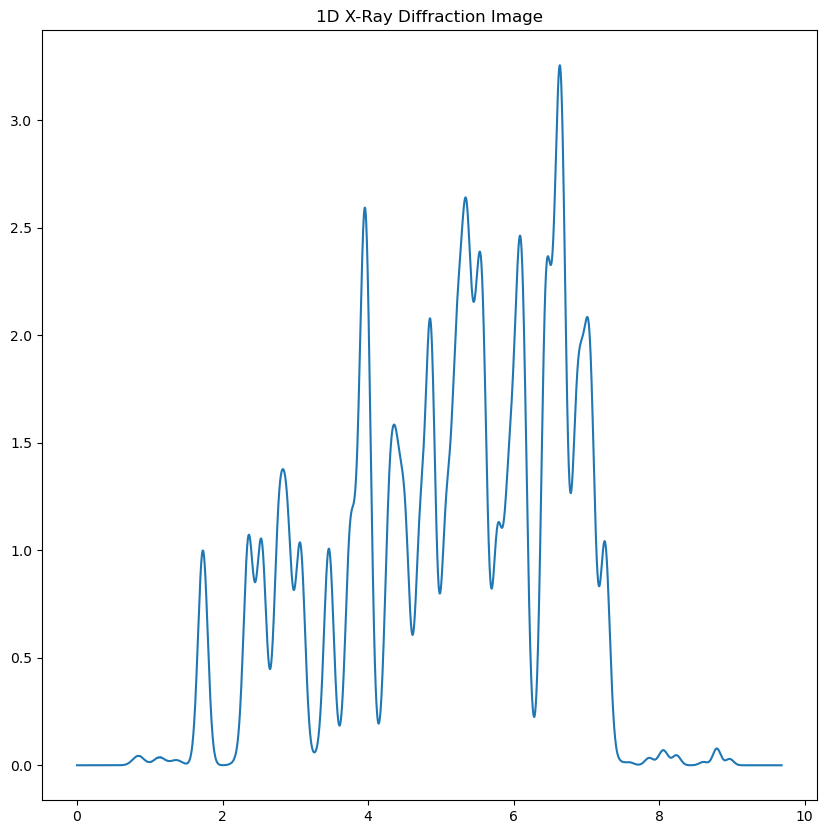

In [28]:
integration = sim.integrate_image(data, .4, .4e-10, 3000, mask = new_mask, show = True)

In [38]:
def make_masks(array, slices):
    masks = []
    for i in slices:
        masks.append(masking.generate_mask_slices(array, 5, i, offset = 7))
        print('Mask with {} slices created'.format(i))
    return masks

[masked_array(
  data=[[-135.00017100451313, -134.97216689027152, -134.94413749056966,
         ..., -45.05619265132289, -45.02816084175853, -45.00015640746067],
        [-135.02817528583523, -135.0001711717571, -134.97214174542282,
         ..., -45.02818839694317, -45.00015656042945, -44.97215212598207],
        [-135.05620485260465, -135.02820076548636, -135.000171339316,
         ..., -45.00015880320792, -44.972126966543236,
         -44.94412255874272],
        ...,
        [135.0561923155709, 135.02818822843457, 135.00015880225814, ...,
         45.00017134026579, 44.97213950359518, 44.94413509577675],
        [135.0281606735792, 135.000156559494, 134.9721271331666, ...,
         45.028203009199196, 45.00017117269255, 44.972166738238265],
        [135.00015640652705, 134.97215229229232, 134.94412289261135, ...,
         45.05620724928089, 45.028175439737566, 45.00017100544677]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

/blue/mbutala/dalverson/SimDAT2D/SimDAT2D/masking.py:120: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Mask with dask.array<getitem, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray> slices created
[masked_array(
  data=[[-135.00017100451313, -134.97216689027152, -134.94413749056966,
         ..., -45.05619265132289, -45.02816084175853, -45.00015640746067],
        [-135.02817528583523, -135.0001711717571, -134.97214174542282,
         ..., -45.02818839694317, -45.00015656042945, -44.97215212598207],
        [-135.05620485260465, -135.02820076548636, -135.000171339316,
         ..., -45.00015880320792, -44.972126966543236,
         -44.94412255874272],
        ...,
        [135.0561923155709, 135.02818822843457, 135.00015880225814, ...,
         45.00017134026579, 44.97213950359518, 44.94413509577675],
        [135.0281606735792, 135.000156559494, 134.9721271331666, ...,
         45.028203009199196, 45.00017117269255, 44.972166738238265],
        [135.00015640652705, 134.97215229229232, 134.94412289261135, ...,
         45.05620724928089, 45.028175439737566, 45.0001710054467

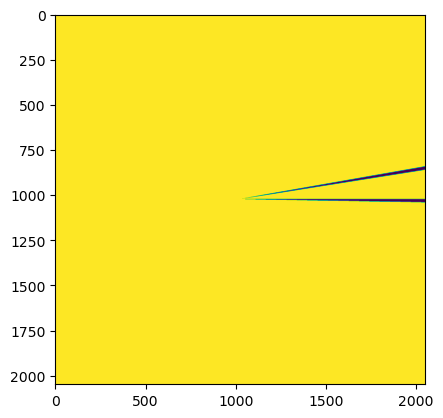

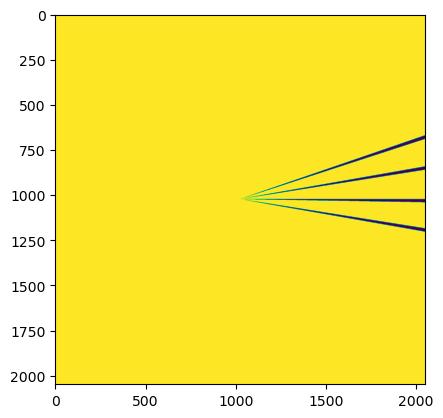

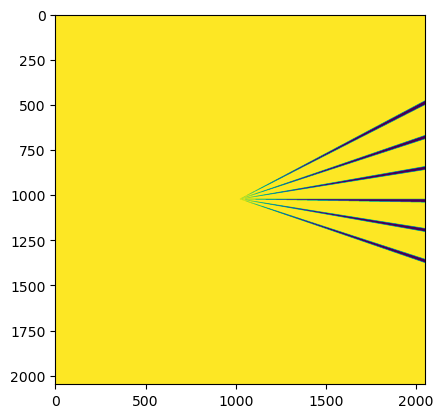

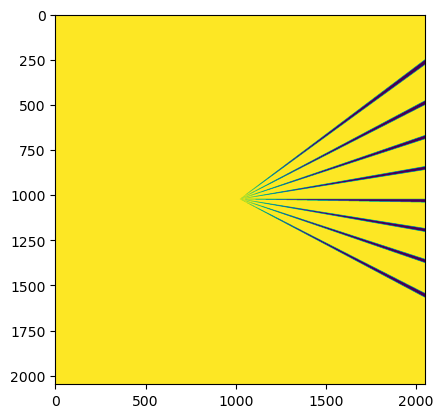

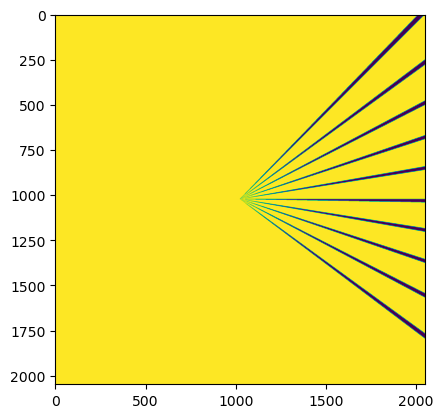

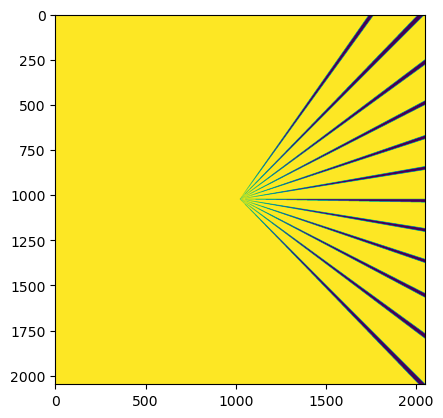

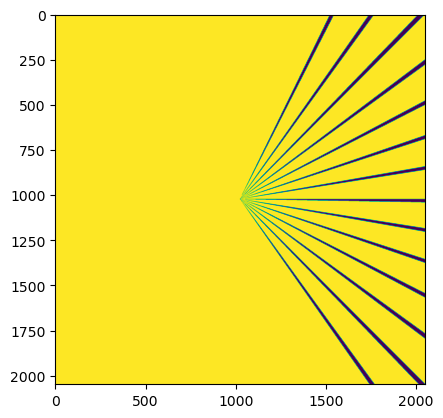

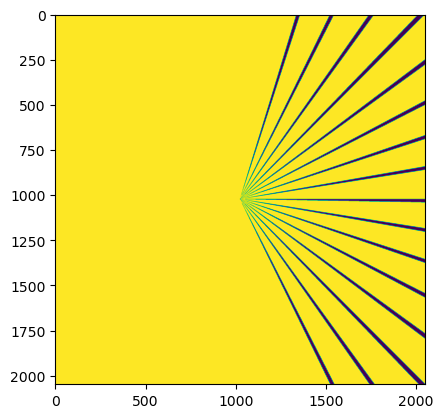

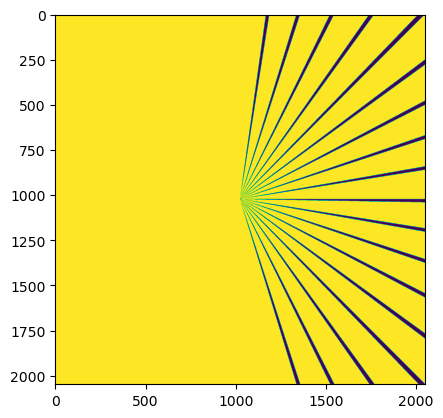

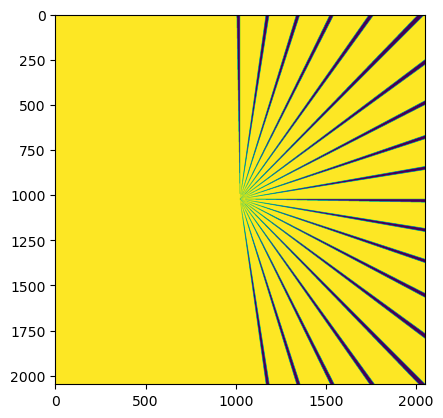

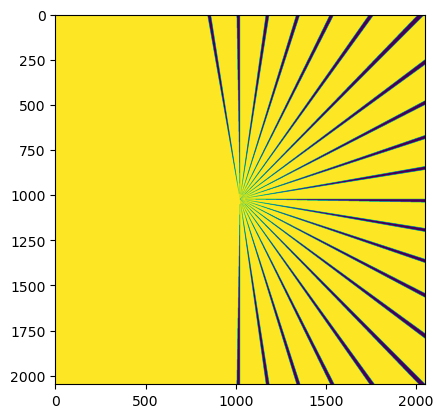

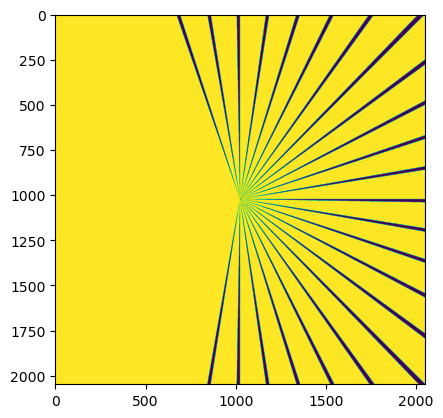

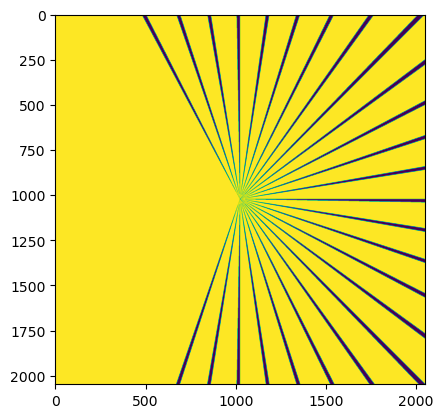

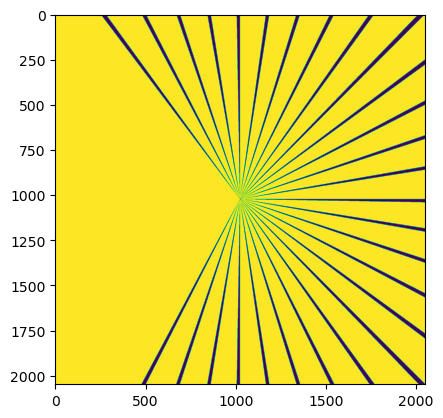

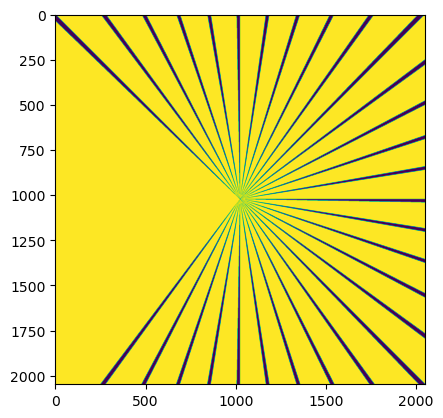

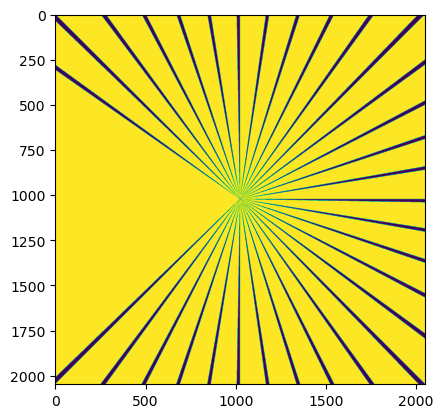

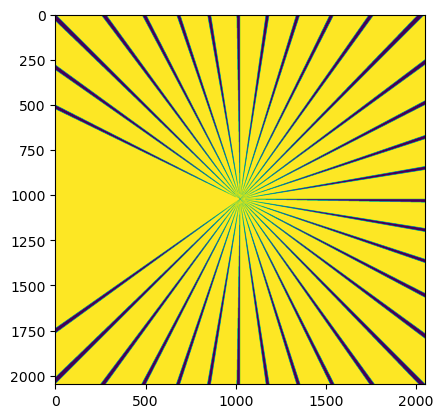

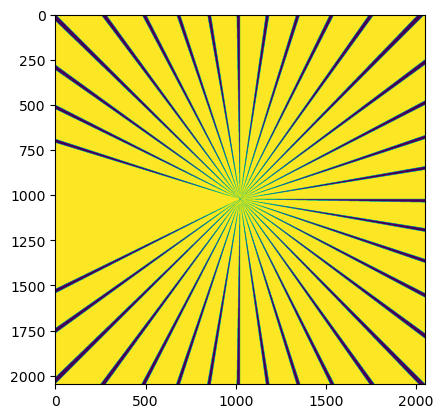

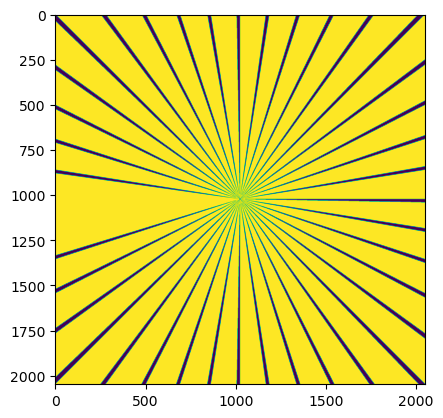

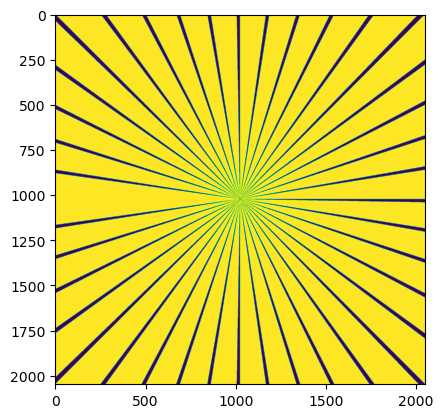

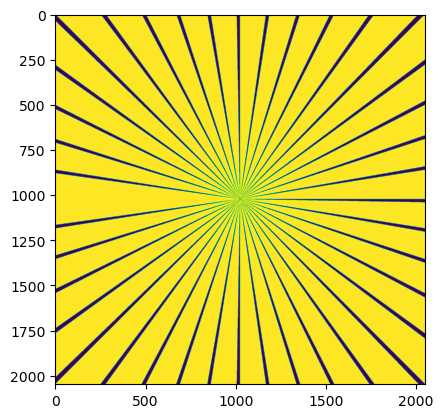

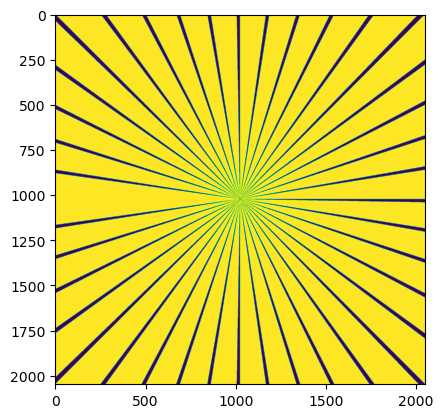

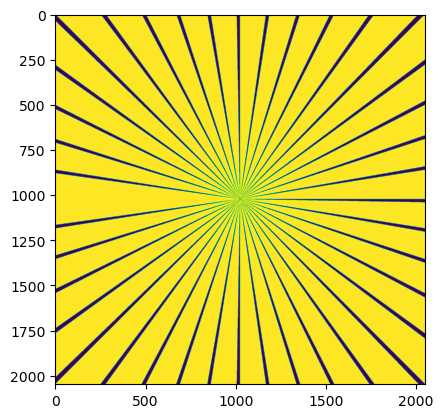

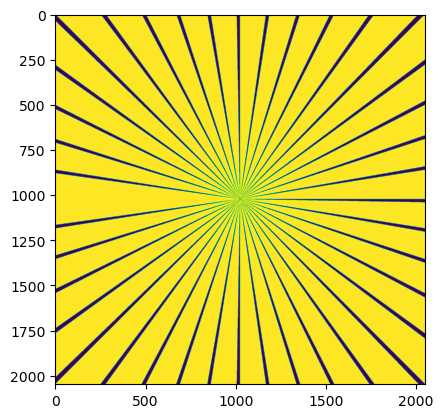

In [42]:
slices = da.arange(1, 25, 1)
my_masks = make_masks(array,slices )

In [43]:
masks = []
for i in range(len(my_masks)):
  masks.append(masking.rotate_mask_360(my_masks[i], 360, 1, plot = False))

In [44]:
flat_list = [element for inner_list in masks for element in inner_list]

In [45]:
len(flat_list)

8592

In [46]:
make_it_even(flat_list[0])

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=True)

In [59]:
even_masks = []
for i in flat_list:
    even_masks.append(make_it_even(i))
    print(f'mask {i} of {len(flat_list)} created')

mask [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]] of 8592 created
mask [[True True True ... True True True]
 [True True True ... True True True]
 [True True True ... True True True]
 ...
 [True True True ... True True True]
 [True True True ... True True True]
 [True True True ... True True True]] of 8592 created
mask [[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]] of 8592 created
mask [[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]] of 8592 created
mask [[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [

KeyboardInterrupt: 

In [60]:
len(even_masks)

4913

In [27]:
import pyFAI
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator

In [28]:
def integrate_image(combined_image, distance, wavelength, resolution = 3000, mask = None, show = False, radial_range = None):
    """
    This function integrates the combined image using the azimuthal integrator and displays the 1D image.
    
    Parameters:
        combined_image (2D array): The image of the combined spots and calibration.
    """
    #initialize the azimuthal integrator
    
     # Initialize the detector
    dete = pyFAI.detectors.Perkin()
    p1, p2, p3 = dete.calc_cartesian_positions()
    poni1 = p1.mean()
    poni2 = p2.mean()
    
    
    ai = AzimuthalIntegrator(dist=distance, poni1=poni1, poni2=poni2, detector=dete, wavelength=wavelength)
    
    #integrate the combined image using the azimuthal integrator
    q, I = ai.integrate1d(combined_image, resolution, radial_range = radial_range, unit = 'q_A^-1', mask = mask)
    
    if show == True:
        #plot the 1D image
        plt.figure(figsize=(10, 10))
        plt.plot(q, I)
        plt.title("1D X-Ray Diffraction Image")
        plt.show()
    
    return q, I

In [78]:
integrations = []
for i in range(len(flat_list)):
    q, I = integrate_image(data, .4, .4e-10, 100, flat_list[i], radial_range=(1, 5))
    integrations.append(I)
    print('Integration {} of {} complete'.format(i+1, len(flat_list)))

Integration 1 of 8592 complete
Integration 2 of 8592 complete
Integration 3 of 8592 complete
Integration 4 of 8592 complete
Integration 5 of 8592 complete
Integration 6 of 8592 complete
Integration 7 of 8592 complete
Integration 8 of 8592 complete
Integration 9 of 8592 complete
Integration 10 of 8592 complete
Integration 11 of 8592 complete
Integration 12 of 8592 complete
Integration 13 of 8592 complete
Integration 14 of 8592 complete
Integration 15 of 8592 complete
Integration 16 of 8592 complete
Integration 17 of 8592 complete
Integration 18 of 8592 complete
Integration 19 of 8592 complete
Integration 20 of 8592 complete
Integration 21 of 8592 complete
Integration 22 of 8592 complete
Integration 23 of 8592 complete
Integration 24 of 8592 complete
Integration 25 of 8592 complete
Integration 26 of 8592 complete
Integration 27 of 8592 complete
Integration 28 of 8592 complete
Integration 29 of 8592 complete
Integration 30 of 8592 complete
Integration 31 of 8592 complete


KeyboardInterrupt: 

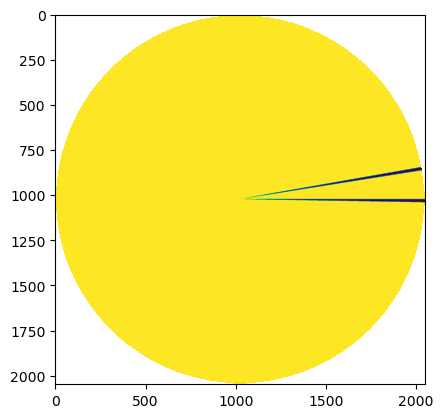

In [65]:
plt.imshow(even_masks[0])

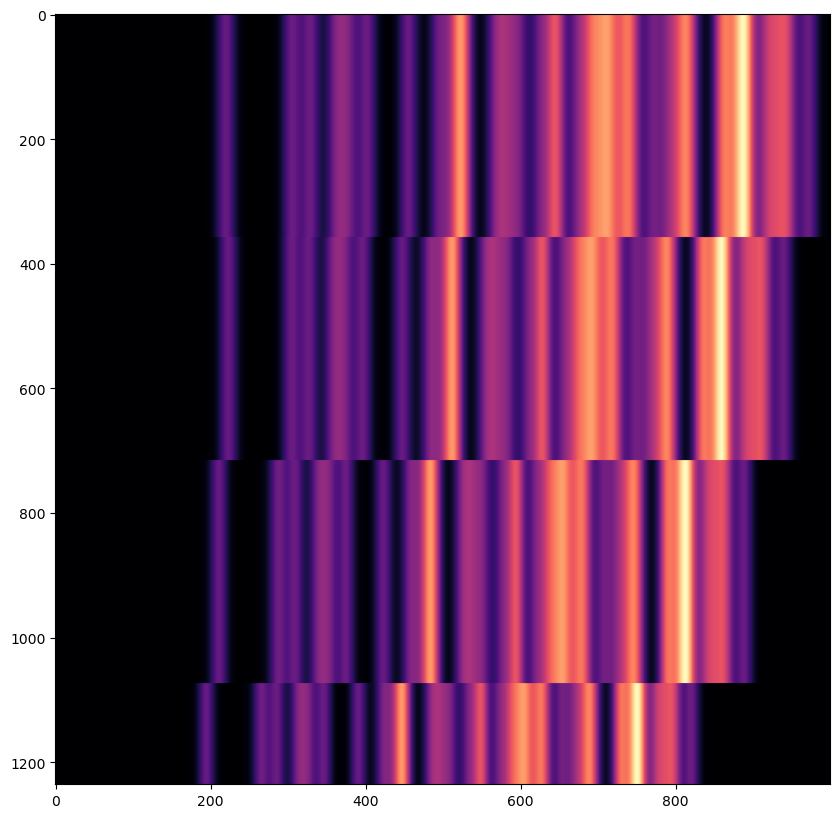

In [62]:
#waterfall plot the 8500 integrations
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(integrations, cmap = 'magma', aspect = 'auto')

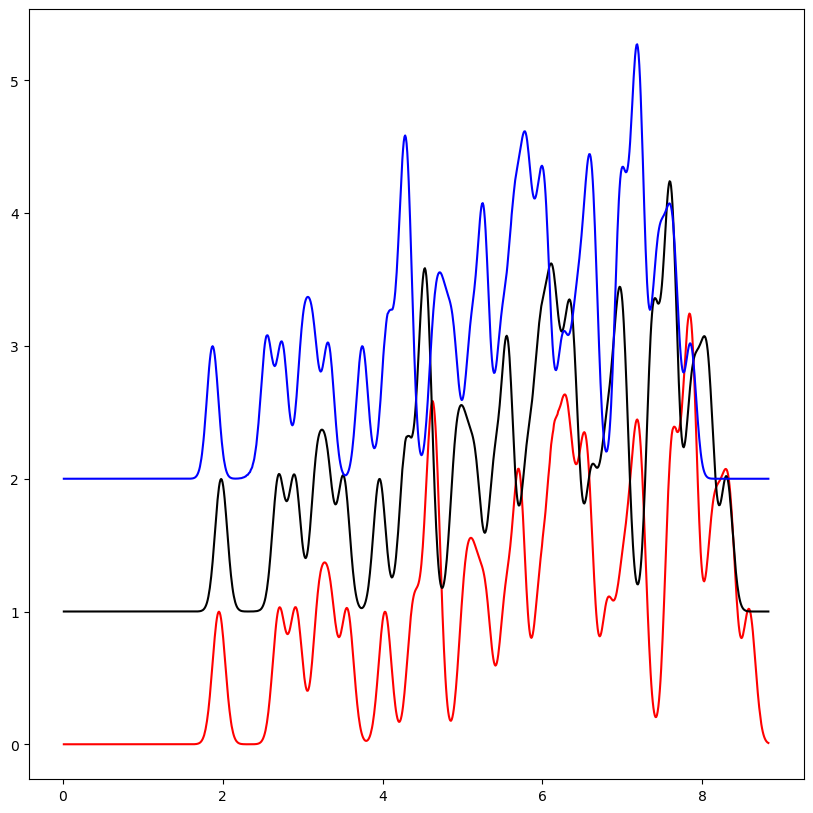

In [64]:
plt.figure(figsize = (10,10))
plt.plot(q, integrations[350], color='red')
plt.plot(q, integrations[550]+1, color='black')
plt.plot(q, integrations[1000]+2, color='blue')
#plt.plot(q, pure-1, color = 'green')

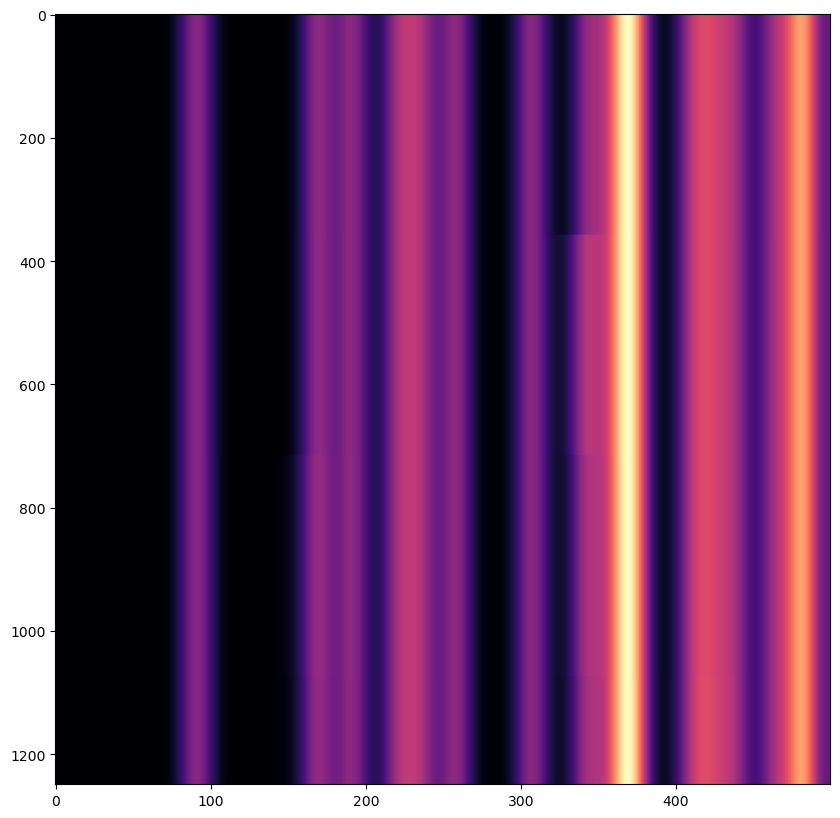

In [73]:
#waterfall plot the 8500 integrations
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(integrations, cmap = 'magma', aspect = 'auto')

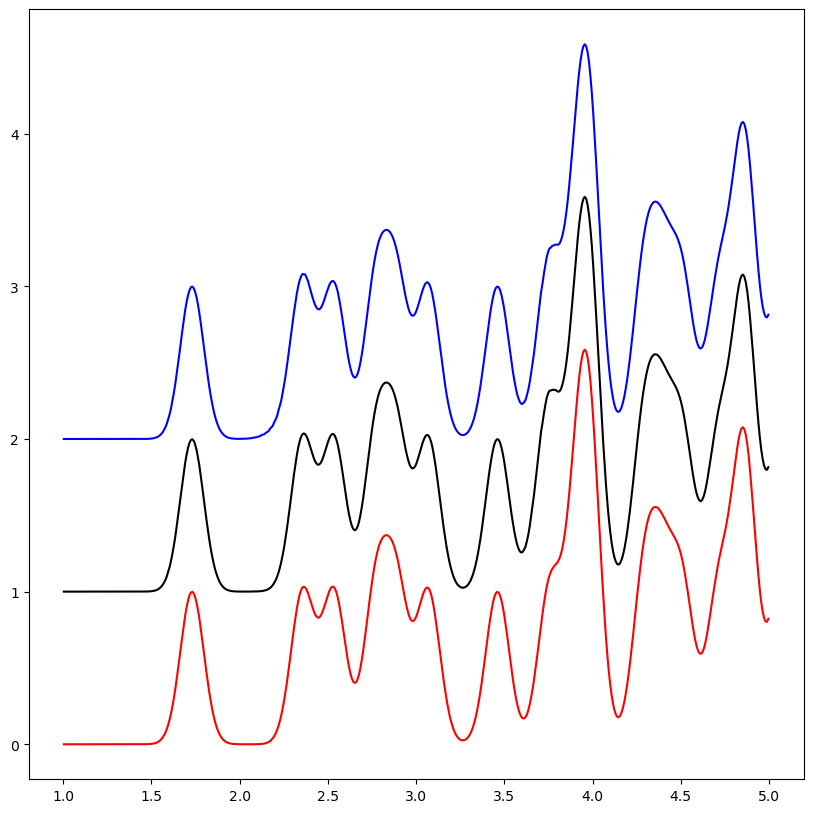

In [76]:
plt.figure(figsize = (10,10))
plt.plot(q, integrations[0], color='red')
plt.plot(q, integrations[400]+1, color='black')
plt.plot(q, integrations[1000]+2, color='blue')

In [1]:
#waterfall plot the 8500 integrations
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(integrations, cmap = 'magma', aspect = 'auto')

NameError: name 'integrations' is not defined

<Figure size 1000x1000 with 0 Axes>

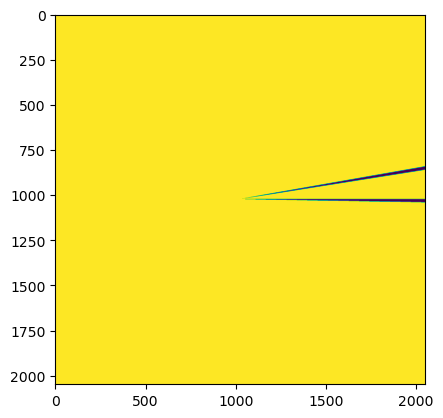

In [80]:
plt.imshow(flat_list[0])

In [81]:
for x in flat_list:
    new_flat_list = np.invert(flat_list)

: 

: 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
data = np.load('simulated_data.npy')

[masked_array(
  data=[[-135.00017100451313, -134.97216689027152, -134.94413749056966,
         ..., -45.05619265132289, -45.02816084175853, -45.00015640746067],
        [-135.02817528583523, -135.0001711717571, -134.97214174542282,
         ..., -45.02818839694317, -45.00015656042945, -44.97215212598207],
        [-135.05620485260465, -135.02820076548636, -135.000171339316,
         ..., -45.00015880320792, -44.972126966543236,
         -44.94412255874272],
        ...,
        [135.0561923155709, 135.02818822843457, 135.00015880225814, ...,
         45.00017134026579, 44.97213950359518, 44.94413509577675],
        [135.0281606735792, 135.000156559494, 134.9721271331666, ...,
         45.028203009199196, 45.00017117269255, 44.972166738238265],
        [135.00015640652705, 134.97215229229232, 134.94412289261135, ...,
         45.05620724928089, 45.028175439737566, 45.00017100544677]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

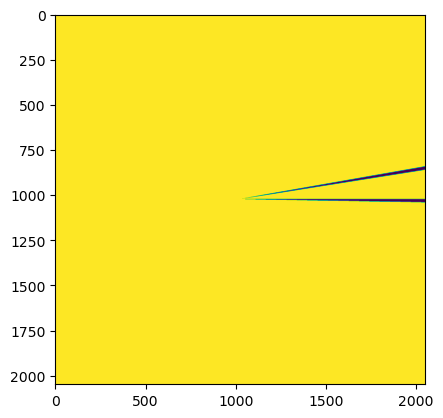

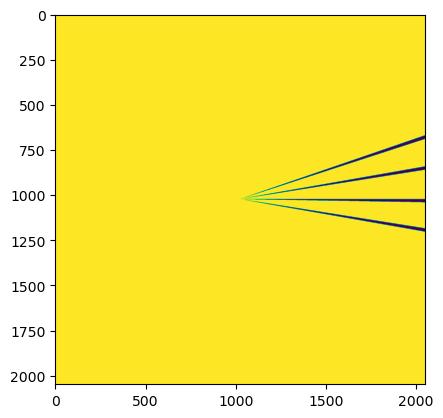

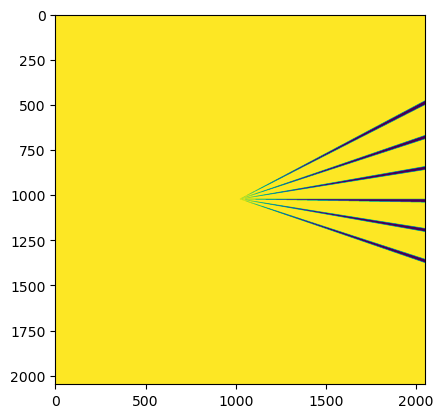

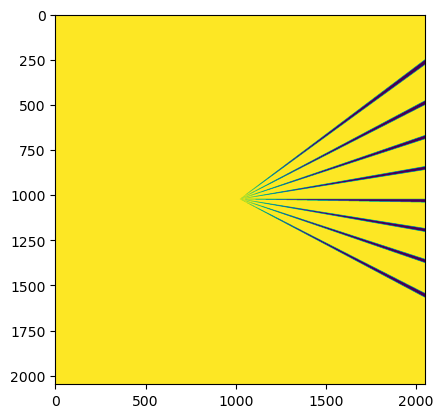

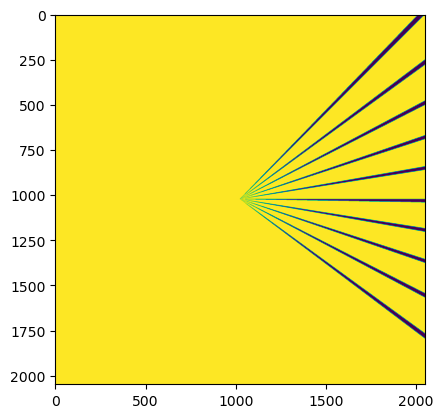

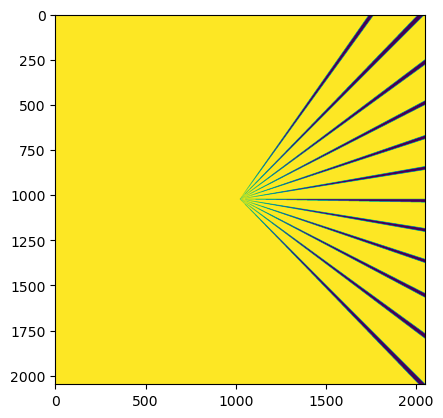

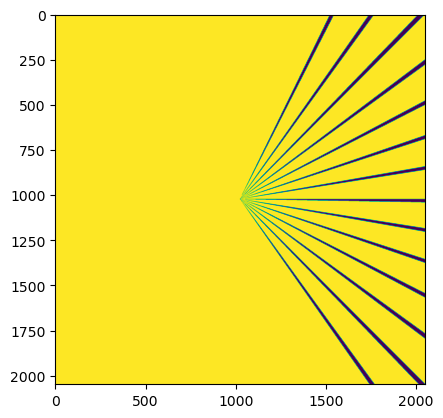

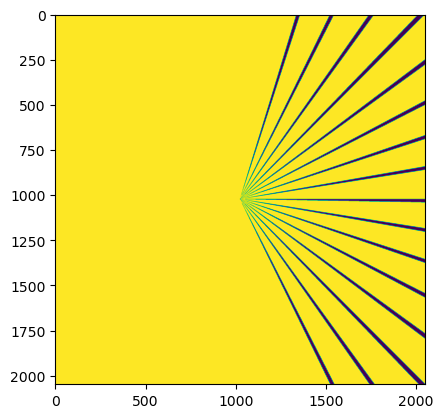

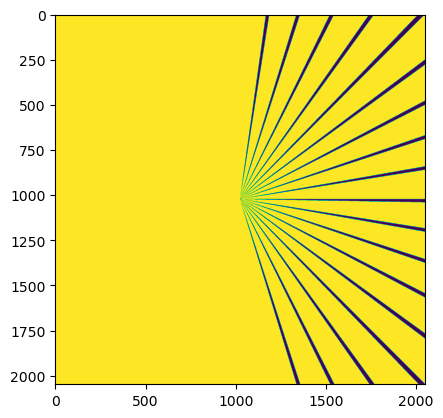

In [37]:
import dask.array as da
slices = da.arange(1, 10, 1)
my_masks = make_masks(array,slices )

In [15]:
masks = []
for i in range(len(my_masks)):
  masks.append(masking.rotate_mask_360(my_masks[i], 360, 30, plot = False))

In [16]:
len(masks)

9

In [17]:
flat_list = [element for inner_list in masks for element in inner_list]

In [18]:
len(flat_list)

108

In [20]:
b = list(flat_list)

for x in range(len(b)):
    b[x] = ~b[x]
    
print(b)

[masked_array(
  data=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=True), masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, -

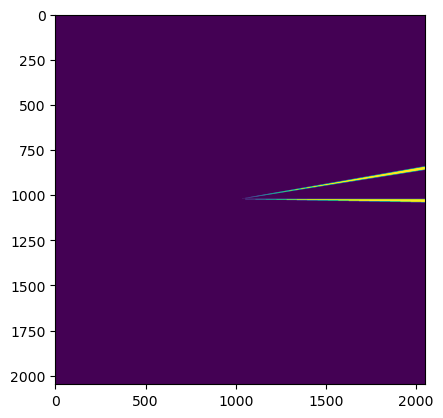

In [21]:
plt.imshow(b[0])

In [25]:
import pyFAI


In [29]:
integrations = []
for i in range(len(b)):
    q, I = integrate_image(data, .4, .4e-10, 100, b[i], radial_range=(1, 5))
    integrations.append(I)
    print('Integration {} of {} complete'.format(i+1, len(b)))

Integration 1 of 108 complete
Integration 2 of 108 complete
Integration 3 of 108 complete
Integration 4 of 108 complete
Integration 5 of 108 complete
Integration 6 of 108 complete
Integration 7 of 108 complete
Integration 8 of 108 complete
Integration 9 of 108 complete
Integration 10 of 108 complete
Integration 11 of 108 complete
Integration 12 of 108 complete
Integration 13 of 108 complete
Integration 14 of 108 complete
Integration 15 of 108 complete
Integration 16 of 108 complete
Integration 17 of 108 complete
Integration 18 of 108 complete
Integration 19 of 108 complete
Integration 20 of 108 complete
Integration 21 of 108 complete
Integration 22 of 108 complete
Integration 23 of 108 complete
Integration 24 of 108 complete
Integration 25 of 108 complete
Integration 26 of 108 complete
Integration 27 of 108 complete
Integration 28 of 108 complete
Integration 29 of 108 complete
Integration 30 of 108 complete
Integration 31 of 108 complete
Integration 32 of 108 complete
Integration 33 of

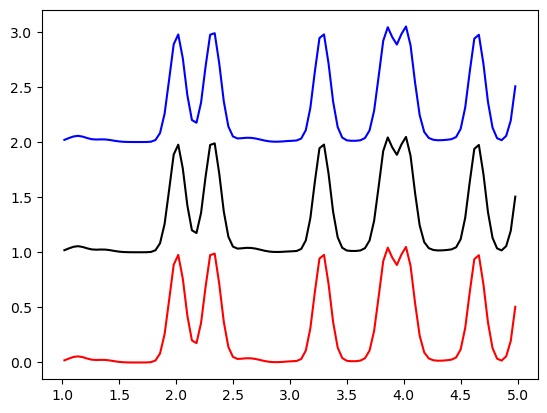

In [32]:
plt.plot(q, integrations[0], color='red')
plt.plot(q, integrations[100]+1, color='black')
plt.plot(q, integrations[30]+2, color='blue')

[masked_array(
  data=[[-135.00017100451313, -134.97216689027152, -134.94413749056966,
         ..., -45.05619265132289, -45.02816084175853, -45.00015640746067],
        [-135.02817528583523, -135.0001711717571, -134.97214174542282,
         ..., -45.02818839694317, -45.00015656042945, -44.97215212598207],
        [-135.05620485260465, -135.02820076548636, -135.000171339316,
         ..., -45.00015880320792, -44.972126966543236,
         -44.94412255874272],
        ...,
        [135.0561923155709, 135.02818822843457, 135.00015880225814, ...,
         45.00017134026579, 44.97213950359518, 44.94413509577675],
        [135.0281606735792, 135.000156559494, 134.9721271331666, ...,
         45.028203009199196, 45.00017117269255, 44.972166738238265],
        [135.00015640652705, 134.97215229229232, 134.94412289261135, ...,
         45.05620724928089, 45.028175439737566, 45.00017100544677]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

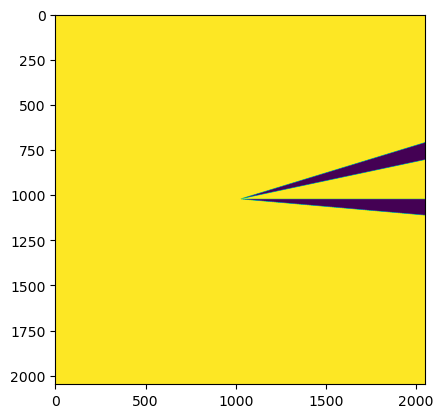

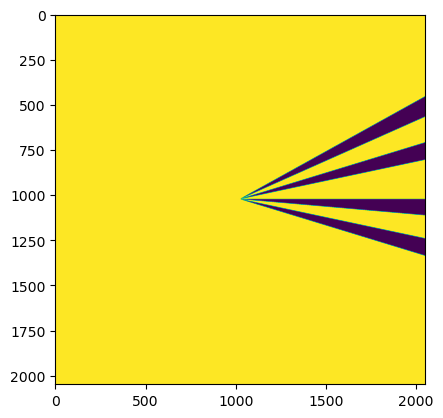

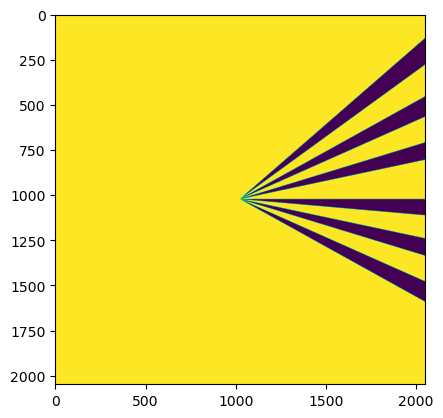

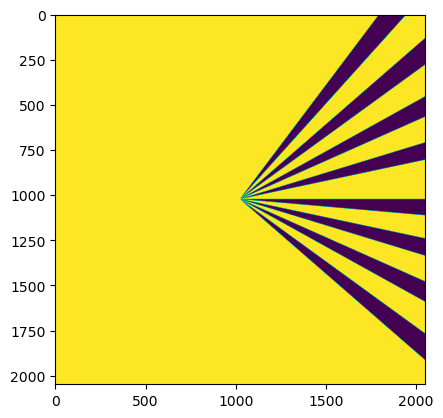

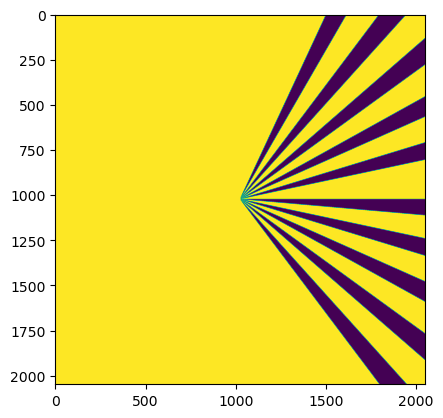

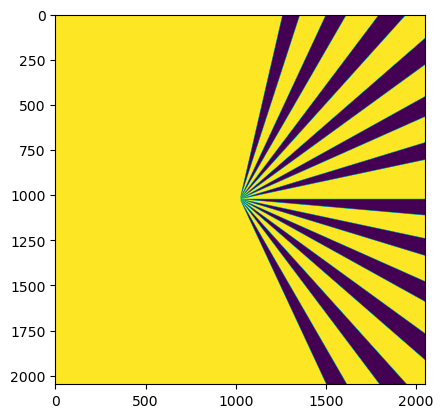

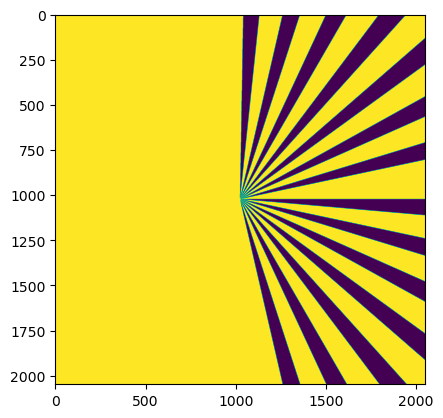

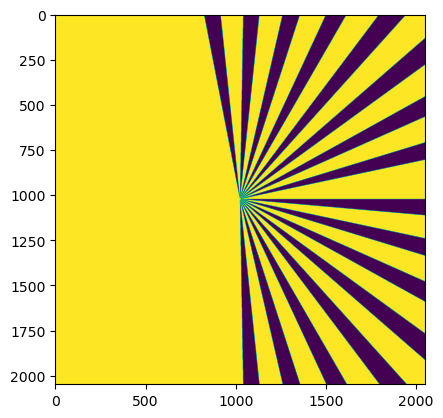

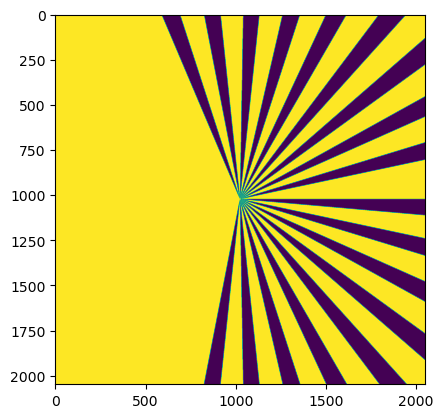

In [39]:
import dask.array as da
slices = da.arange(1, 10, 1)
my_masks = make_masks(array,slices )

In [40]:
masks = []
for i in range(len(my_masks)):
  masks.append(masking.rotate_mask_360(my_masks[i], 360, 30, plot = False))

In [41]:
flat_list = [element for inner_list in masks for element in inner_list]

In [62]:
integrations = []
for i in range(len(flat_list)):
    q, I = integrate_image(data, .4, .4e-10, 3000, flat_list[i], radial_range=(1, 5))
    integrations.append(I)
    print('Integration {} of {} complete'.format(i+1, len(flat_list)))

Integration 1 of 108 complete
Integration 2 of 108 complete
Integration 3 of 108 complete
Integration 4 of 108 complete
Integration 5 of 108 complete
Integration 6 of 108 complete
Integration 7 of 108 complete
Integration 8 of 108 complete
Integration 9 of 108 complete
Integration 10 of 108 complete
Integration 11 of 108 complete
Integration 12 of 108 complete
Integration 13 of 108 complete
Integration 14 of 108 complete
Integration 15 of 108 complete
Integration 16 of 108 complete
Integration 17 of 108 complete
Integration 18 of 108 complete
Integration 19 of 108 complete
Integration 20 of 108 complete
Integration 21 of 108 complete
Integration 22 of 108 complete
Integration 23 of 108 complete
Integration 24 of 108 complete
Integration 25 of 108 complete
Integration 26 of 108 complete
Integration 27 of 108 complete
Integration 28 of 108 complete
Integration 29 of 108 complete
Integration 30 of 108 complete
Integration 31 of 108 complete
Integration 32 of 108 complete
Integration 33 of

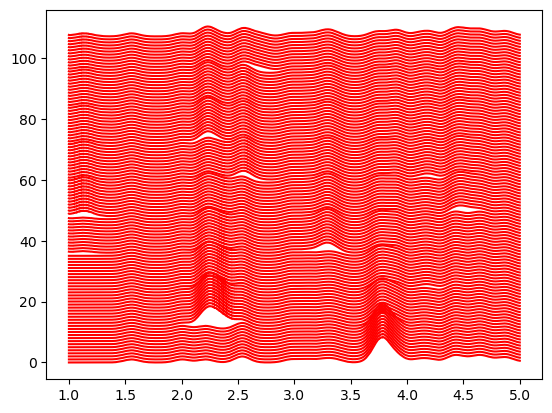

In [63]:
for i in range(len(integrations)):
    plt.plot(q, integrations[i]+i*1.001, color='red')

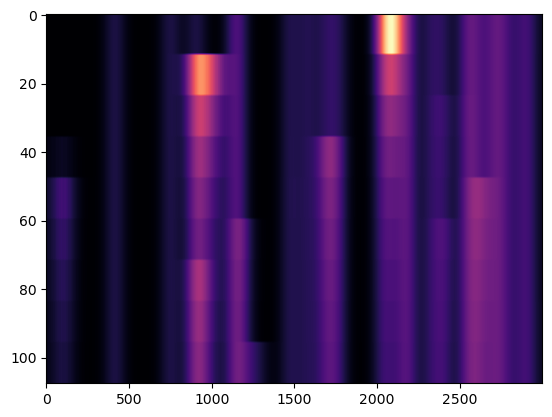

In [64]:
plt.imshow(integrations, cmap = 'magma', aspect = 'auto')

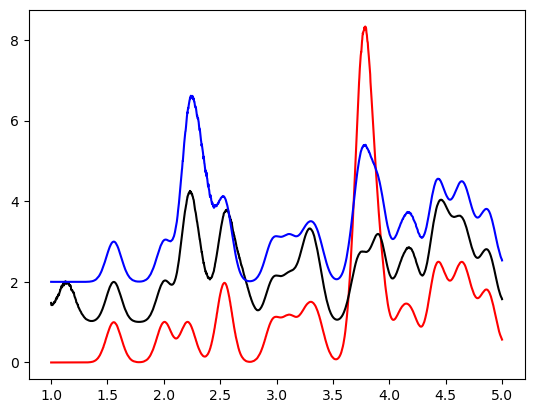

In [65]:
plt.plot(q, integrations[0], color='red')
plt.plot(q, integrations[100]+1, color='black')
plt.plot(q, integrations[30]+2, color='blue')